# Cerebellar volumetry analysis with GLM: Comparing MAGeT ans SUIT results
## Data: 
    - 1. Cerebellar SUIT segmentation; 
         - SUIT: Left/right 1-X+Dentate+Interposed+Fastigial and Vermis
    - 2. Cerebellar MAGeTBrain [MAGeTBrain pipeline](https://github.com/CobraLab/documentation/wiki/MAGeTBrain#collecting-volumes)
        - MAGeT: Left/right 1-X+WhiteMatter(CM)

## Cohorts
- Current cohort: MNI ET/NC (38/32), PPMI/ADNI NC (116/308) QC applied.

## Tasks: GLM for 
- Compare lobule volumes： 

## Covariates
- Age, Sex, intracranial volume (eTIV, infratentorium, cerebellar volume), site.

In [1]:
#reading/merging/selecting data
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = Path("/codes/tab_data")
maget_dir = Path("/codes/preproc/maget/results")
cohorts_str = ['ADNI','ET','NC','PPMI']
et_maget_read = pd.read_csv(maget_dir/('ET_volumes.csv'), sep=',', header=0, index_col=0)
et_maget_read.index= [x[2:10] for x in et_maget_read.index]
nc_maget_read = pd.read_csv(maget_dir/('NC_volumes.csv'), sep=',', header=0, index_col=0)
nc_maget_read.index= [x[2:10] for x in nc_maget_read.index]
adni_maget_read = pd.read_csv(maget_dir/('ADNI_volumes.csv'), sep=',', header=0, index_col=0)
ppmi_maget_read = pd.read_csv(maget_dir/('PPMI_volumes.csv'), sep=',', header=0, index_col=0)
maget_df = pd.concat([et_maget_read,nc_maget_read,ppmi_maget_read,adni_maget_read])
maget_df.index= [x.replace('-','_') for x in maget_df.index]
maget_df.loc[:,'L_I_IV']  = maget_df.loc[:,'L_I_II']+maget_df.loc[:,'L_III']+maget_df.loc[:,'L_IV']
maget_df.loc[:,'R_I_IV'] = maget_df.loc[:,'R_I_II']+maget_df.loc[:,'R_III']+maget_df.loc[:,'R_IV']

#[maget_res=maget_res+{x: pd.read_csv(maget_dir/(x+"_volumes.csv"), sep=',', header=0, index_col=0)} for x in cohorts_str]
data_all_file  = data_dir/'all_Des-cere_preped_qcInfo.csv'
data_df    = pd.read_csv(data_all_file , sep=',', header=0, index_col=0);
data_df=data_df.join(maget_df, how='left')

211111-08:30:47,822 nipype.utils WARNING:
	 A newer version (1.7.0) of nipy/nipype is available. You are using 1.5.0


In [2]:
#GLM analysis and non-parametric comparison
SUIT_l_labels = ['Left_I_IV',  'Left_V', 'Left_VI', 'Left_CrusI', 'Left_CrusII', 
                 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb', 'Left_IX', 'Left_X', 
                 'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'];
SUIT_r_labels = ['Right_I_IV','Right_V','Right_VI','Right_CrusI','Right_CrusII',
                 'Right_VIIb','Right_VIIIa','Right_VIIIb','Right_IX','Right_X',
                 'Right_Dentate','Right_Interposed','Right_Fastigial'];
SUIT_v_labels = ['Vermis_VI', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VIIb', 
                 'Vermis_VIIIa','Vermis_VIIIb', 'Vermis_IX', 'Vermis_X'];
MAGeT_l_labels = ['L_I_IV',  'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 
                 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X'];  # NO  'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'
MAGeT_r_labels = ['R_I_IV','R_V','R_VI','R_Crus_I','R_Crus_II',
                 'R_VIIB','R_VIIIA','R_VIIIB','R_IX','R_X'];  # NO  'Right_Dentate','Right_Interposed','Right_Fastigial'
end_lubule_list=len(MAGeT_l_labels)
#maget_df.columns=
#['L_I_II', 'L_III', 'L_IV', 'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X', 'L_CM', 
# 'R_I_II', 'R_III', 'R_IV', 'R_V', 'R_VI', 'R_Crus_I', 'R_Crus_II', 'R_VIIB', 'R_VIIIA', 'R_VIIIB', 'R_IX', 'R_X', 'R_CM']
# No vermis in MAGeT as well.

Text(0.5, 1.0, 'SUIT and MAGeT results (MNI cohort)')

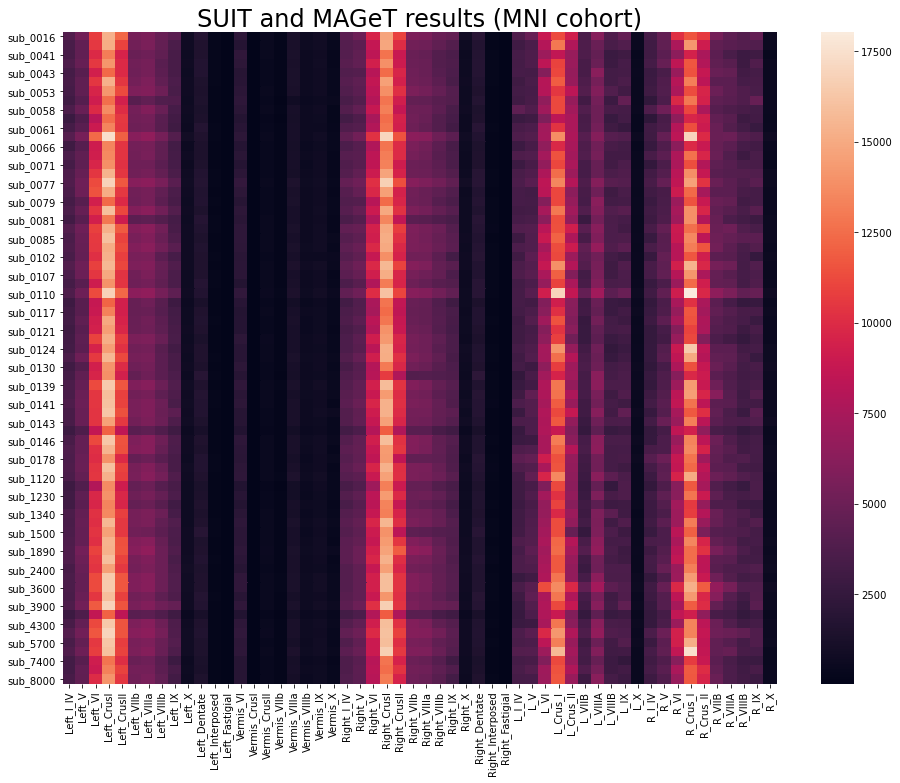

In [3]:
# Heatmap of results between SUIT and MAGeT measures (intercept)
vis_df=data_df.loc[(data_df['group']=='ET') | (data_df['group']=='NC')].copy()
vis_df=vis_df.loc[:,SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+MAGeT_l_labels+MAGeT_r_labels]
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(vis_df, ax=ax)
ax.set_title('SUIT and MAGeT results (MNI cohort)', fontsize=24)

Text(0.5, 1.0, 'SUIT and MAGeT results (Augmented cohort)')

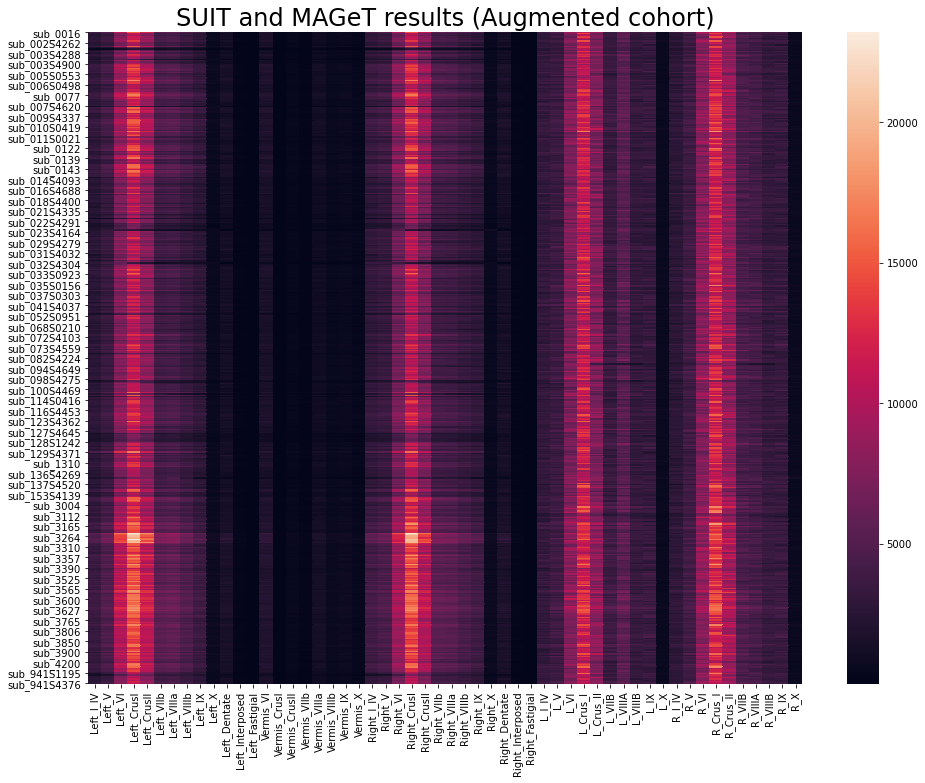

In [4]:
# Heatmap of results between SUIT and MAGeT measures (intercept)
vis_df=data_df.loc[:,SUIT_l_labels+SUIT_v_labels+SUIT_r_labels+MAGeT_l_labels+MAGeT_r_labels].copy()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(vis_df, ax=ax)
ax.set_title('SUIT and MAGeT results (Augmented cohort)', fontsize=24)

,Left_I_IV,Left_V,Left_VI,Left_CrusI,Left_CrusII,Left_VIIb,Left_VIIIa,Left_VIIIb,Left_IX,Left_X,...,R_I_IV,R_V,R_VI,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X
Left_I_IV,1.000000,0.920891,0.810288,0.737488,0.744841,0.740020,0.750194,0.716753,0.572372,0.630626,...,0.653812,0.623303,0.506338,0.580101,0.411871,0.445919,0.572504,0.552616,0.370190,0.317522
Left_V,0.920891,1.000000,0.867804,0.804151,0.758269,0.717203,0.728956,0.728759,0.644934,0.634072,...,0.565434,0.639636,0.453249,0.567335,0.362920,0.427323,0.463342,0.511182,0.395559,0.392465
Left_VI,0.810288,0.867804,1.000000,0.860743,0.765491,0.741261,0.753117,0.771747,0.686906,0.651706,...,0.315543,0.435656,0.402935,0.603602,0.286420,0.427519,0.457776,0.463594,0.387762,0.441776
Left_CrusI,0.737488,0.804151,0.860743,1.000000,0.807411,0.789971,0.787016,0.773317,0.728809,0.703479,...,0.244088,0.405995,0.364113,0.686452,0.353472,0.452911,0.436371,0.414027,0.450883,0.532720
Left_CrusII,0.744841,0.758269,0.765491,0.807411,1.000000,0.918239,0.883918,0.811198,0.670718,0.637937,...,0.296597,0.345744,0.333347,0.558444,0.616013,0.617520,0.577128,0.483426,0.437682,0.424872
Left_VIIb,0.740020,0.717203,0.741261,0.789971,0.918239,1.000000,0.970048,0.877141,0.593990,0.627446,...,0.342366,0.359334,0.243374,0.551781,0.523656,0.546974,0.588032,0.448274,0.333314,0.352857
Left_VIIIa,0.750194,0.728956,0.753117,0.787016,0.883918,0.970048,1.000000,0.916739,0.613528,0.640757,...,0.358372,0.409961,0.246485,0.558017,0.539241,0.538663,0.586780,0.460564,0.354218,0.363989
Left_VIIIb,0.716753,0.728759,0.771747,0.773317,0.811198,0.877141,0.916739,1.000000,0.677256,0.659174,...,0.386508,0.442591,0.212047,0.490180,0.442764,0.434176,0.465005,0.508855,0.428457,0.349845
Left_IX,0.572372,0.644934,0.686906,0.728809,0.670718,0.593990,0.613528,0.677256,1.000000,0.508486,...,0.154346,0.326661,0.312064,0.516261,0.471758,0.482602,0.383933,0.410988,0.791473,0.451745
Left_X,0.630626,0.634072,0.651706,0.703479,0.637937,0.627446,0.640757,0.659174,0.508486,1.000000,...,0.353432,0.491449,0.351571,0.588703,0.293848,0.238583,0.370028,0.394482,0.393709,0.582966


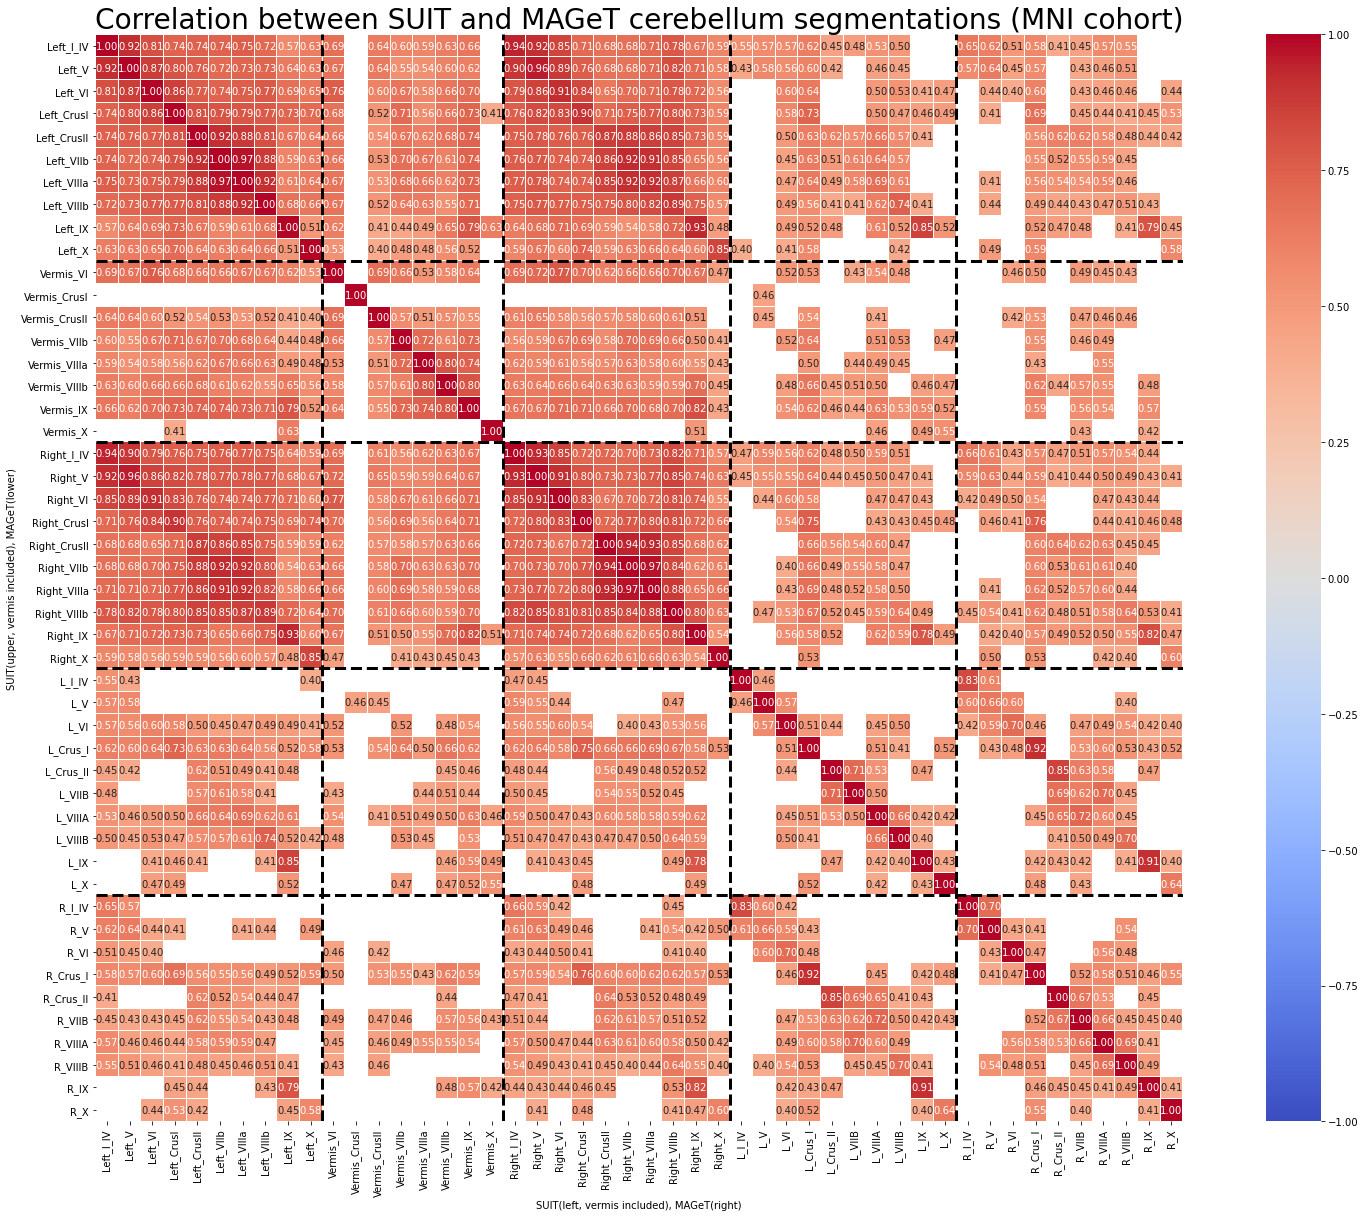

In [5]:
# Heatmap of correlation between SUIT and MAGeT measures (intercept)
C_MAP='coolwarm'; TH=0.4
vis_df=data_df.loc[(data_df['group']=='ET') | (data_df['group']=='NC')].copy()
vis_df=vis_df.loc[:,SUIT_l_labels[:end_lubule_list]+SUIT_v_labels+SUIT_r_labels[:end_lubule_list]+MAGeT_l_labels+MAGeT_r_labels]

corr_=vis_df.corr()
mask_=corr_.where(corr_>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (MNI cohort)', fontsize=28)
line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f1.savefig("MNI_SUIT-MAGeT_comp.jpg")
display(corr_)

,Left_I_IV,Left_V,Left_VI,Left_CrusI,Left_CrusII,Left_VIIb,Left_VIIIa,Left_VIIIb,Left_IX,Left_X,...,R_I_IV,R_V,R_VI,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X
Left_I_IV,1.000000,0.979293,0.962142,0.937619,0.928483,0.926592,0.926109,0.935801,0.916168,0.890741,...,0.468522,0.422977,0.265216,0.479553,0.400922,0.361201,0.282956,0.428023,0.360485,0.117033
Left_V,0.979293,1.000000,0.979907,0.943261,0.935803,0.931260,0.928595,0.938058,0.921027,0.911972,...,0.432857,0.443273,0.282491,0.487723,0.402107,0.362436,0.272255,0.423872,0.361116,0.140421
Left_VI,0.962142,0.979907,1.000000,0.964381,0.948913,0.948520,0.944851,0.954204,0.935237,0.900633,...,0.404567,0.392209,0.272675,0.491001,0.375910,0.347559,0.258788,0.406349,0.347595,0.133683
Left_CrusI,0.937619,0.943261,0.964381,1.000000,0.956370,0.957319,0.955268,0.958640,0.941252,0.876569,...,0.378837,0.369807,0.250544,0.550542,0.356992,0.330044,0.258612,0.404071,0.349934,0.139365
Left_CrusII,0.928483,0.935803,0.948913,0.956370,1.000000,0.989667,0.982783,0.969662,0.941949,0.876994,...,0.378212,0.379688,0.233466,0.470932,0.466426,0.405502,0.322982,0.421635,0.366261,0.155120
Left_VIIb,0.926592,0.931260,0.948520,0.957319,0.989667,1.000000,0.994791,0.978284,0.937359,0.878820,...,0.394881,0.380330,0.238504,0.473004,0.457807,0.412823,0.331732,0.423381,0.365807,0.145260
Left_VIIIa,0.926109,0.928595,0.944851,0.955268,0.982783,0.994791,1.000000,0.983352,0.938735,0.881979,...,0.398341,0.383714,0.234991,0.471426,0.452123,0.398537,0.329628,0.423239,0.367974,0.148753
Left_VIIIb,0.935801,0.938058,0.954204,0.958640,0.969662,0.978284,0.983352,1.000000,0.960383,0.894642,...,0.420396,0.398689,0.225601,0.475890,0.414407,0.371373,0.301553,0.453312,0.402878,0.121455
Left_IX,0.916168,0.921027,0.935237,0.941252,0.941949,0.937359,0.938735,0.960383,1.000000,0.863076,...,0.381963,0.384335,0.218649,0.479698,0.409932,0.351791,0.274543,0.437697,0.500507,0.120459
Left_X,0.890741,0.911972,0.900633,0.876569,0.876994,0.878820,0.881979,0.894642,0.863076,1.000000,...,0.381419,0.384337,0.248022,0.464949,0.383428,0.342500,0.247865,0.376798,0.362749,0.170306


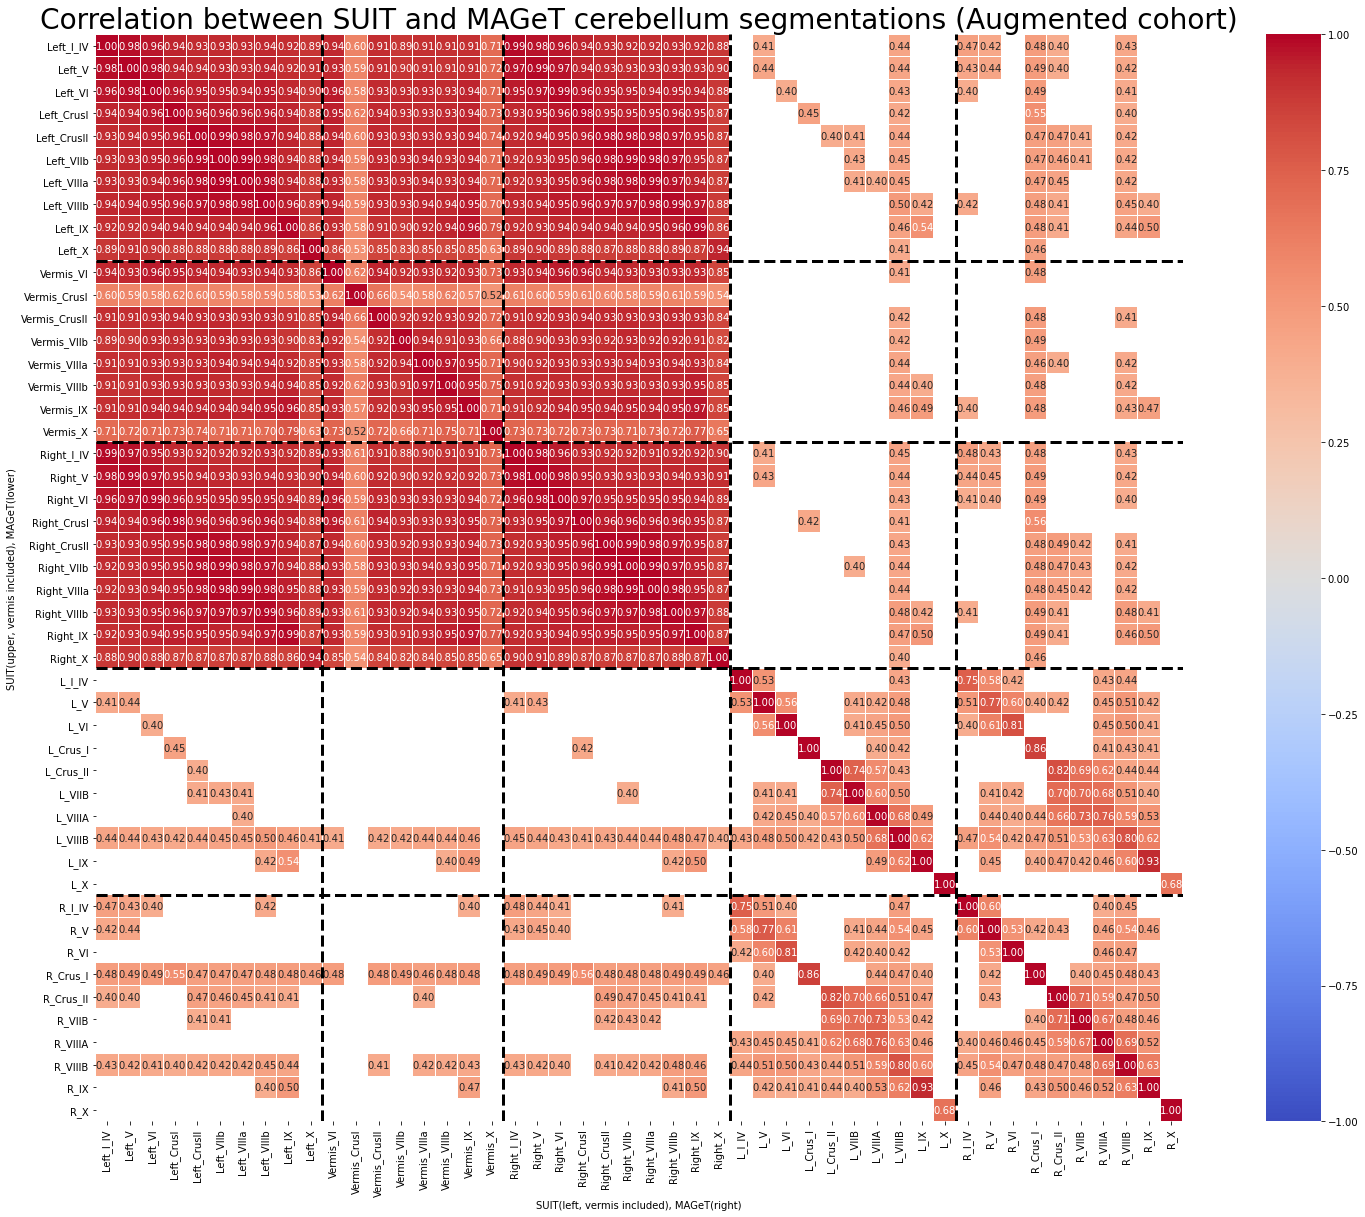

In [6]:
# Heatmap of correlation between SUIT and MAGeT measures (intercept)
C_MAP='coolwarm'; TH=0.4
vis_df=data_df.loc[:,SUIT_l_labels[:end_lubule_list]+SUIT_v_labels+SUIT_r_labels[:end_lubule_list]+MAGeT_l_labels+MAGeT_r_labels].copy()

corr_=vis_df.corr()
mask_=corr_.where(corr_>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
#mask_=mask_.where(mask_==np.NaN, True)

# Draw a heatmap with the numeric values in each cell
f2, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (Augmented cohort)', fontsize=28)
line_pos=[end_lubule_list,end_lubule_list+len(SUIT_v_labels),end_lubule_list*2+len(SUIT_v_labels),end_lubule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f2.savefig("AugCohort_SUIT-MAGeT_comp.jpg")
display(corr_)

In [7]:
# GLM analysis